In [2]:
# basics
import os
import utilities.utils as utils
import numpy as np
from tqdm.notebook import tqdm 
from config import PATH, CITIES, TEST_CITY, LOGLEVEL
# custom modules
from data_acquisition.datahandler import DataHandler


# Configure logging for the pipeline
logger = utils.setup_logger(level=LOGLEVEL)

In [3]:
test_city = TEST_CITY

datahandler = DataHandler(logger, path_to_data_directory=PATH)
datahandler.openeo_temporal_extent=["2023-03-01", "2023-10-31"]


# since the openeo backend is sometimes quite buggy, we used these functions to handle jobs, if the pipeline is interrupted
datahandler.connect_to_openeo()
# datahandler.get_jobs()
# datahandler.delete_jobs() # delete all previous jobs

In [6]:
# load images and mask for all specified cites
import os

for city in tqdm(CITIES):
    buildings = None
    if not os.path.exists(os.path.join(datahandler.path_to_data_directory,city,'building_mask_dense.tif')):
        print("loading local buildings")
        buildings = datahandler.get_buildings(city)
    image = datahandler.get_satellite_image(city).transpose(1,2,0)
    sparse_mask = datahandler.get_building_mask(city, all_touched=False, loaded_buildings=buildings)
    dense_mask = datahandler.get_building_mask(city, all_touched=True, loaded_buildings=buildings)
    boundary_mask = datahandler.get_boundaries_mask(city)



# load test data
image = datahandler.get_satellite_image(TEST_CITY).transpose(1,2,0)
sparse_mask = datahandler.get_building_mask(TEST_CITY, all_touched=False)
dense_mask = datahandler.get_building_mask(TEST_CITY, all_touched=True)
boundary_mask = datahandler.get_boundaries_mask(TEST_CITY)

  0%|          | 0/14 [00:00<?, ?it/s]

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

### Plot Berlin RGB, Berlin with MASK overlay

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

p_down, p_up [200. 296. 232. 288. 219. 313.] [2545. 2351. 2146. 4188. 2732. 3103.]


(6, 1361, 1427)

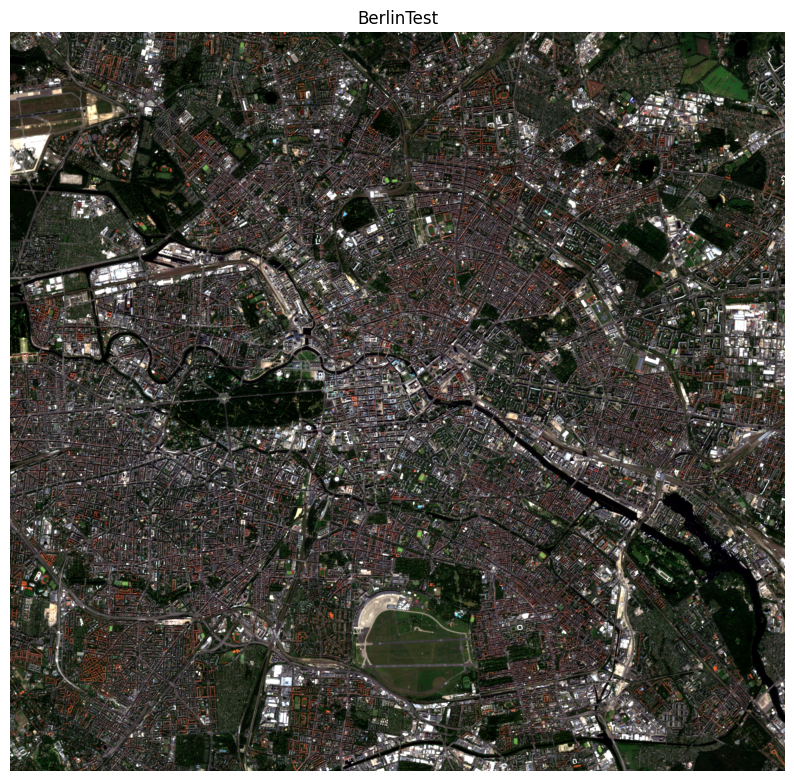

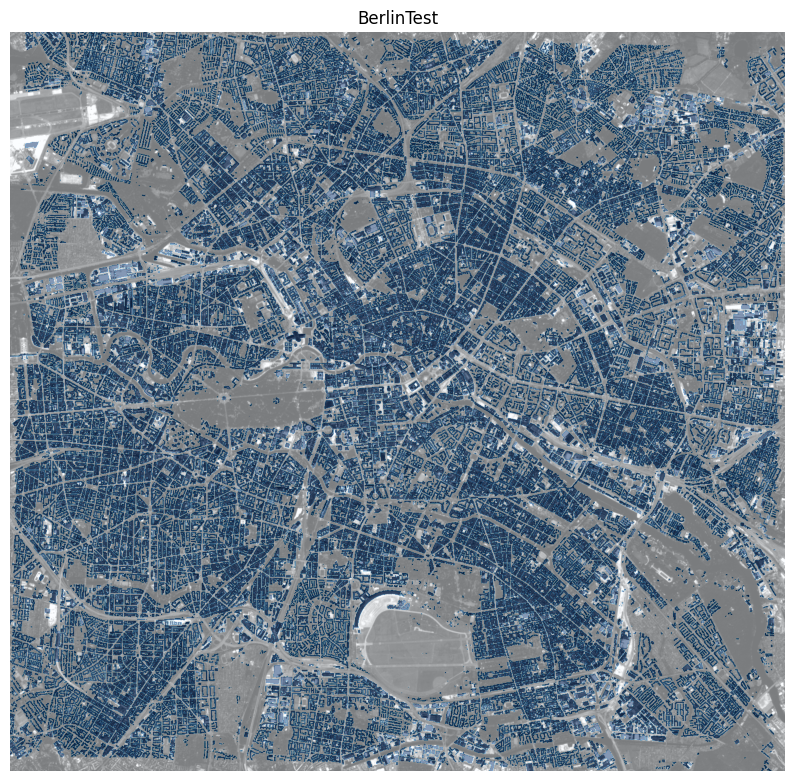

In [15]:
from utilities.plot_utils import (plot_band_with_mask, 
                                  histogram_scaler_bands, 
                                  describe_tif, 
                                  plot_bands)



# Can also be done with the DataHandler
# import rasterio
# with rasterio.open("./data/Berlin/openEO.tif") as src:
#     describe_tif(src)
#     image = src.read([1,2,3,4,5,6])
# with rasterio.open("./data/Berlin/building_mask_dense.tif") as src:
#     describe_tif(src)
#     dense_mask = src.read(1)
# with rasterio.open("./data/Berlin/boundaries_mask.tif") as src:
#     describe_tif(src)
#     boundary_mask = src.read(1)


city = TEST_CITY[0]
image = datahandler.get_satellite_image(city).transpose(2,0,1)
dense_mask = datahandler.get_building_mask(city, all_touched=True, loaded_buildings=buildings)
boundary_mask = datahandler.get_boundaries_mask(city)

# for better understanding, what the data bands are -> the dict
b = {
    "B04": 0,
    "B03": 1,
    "B02": 2,
    "B08": 3,
    "B12": 4,
    "B11": 5,
}


# sclaes the percentile values of the bands to 0-1
image =  histogram_scaler_bands(image, 1.0, 99.0)

display(image.shape)
plot_bands(image, bands=[b["B04"], b["B03"], b["B02"]], title="BerlinTest")
plot_band_with_mask(image[b["B04"]], dense_mask, title="BerlinTest")
# plot_band_with_mask(image[b["B04"]], boundary_mask, cmap_band="Blues",cmap_mask="Reds", title="BerlinTest")
# boundary_mask.shape

### Building Mask Berlin

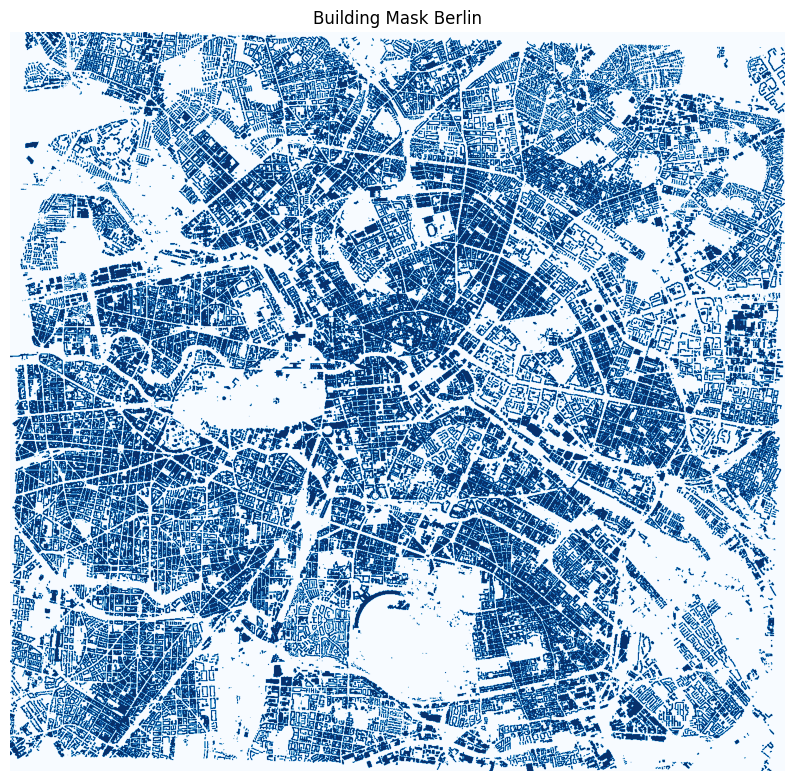

In [16]:
from utilities.plot_utils import plot_band

plot_band(dense_mask, title="Building Mask Berlin")

### Single Band

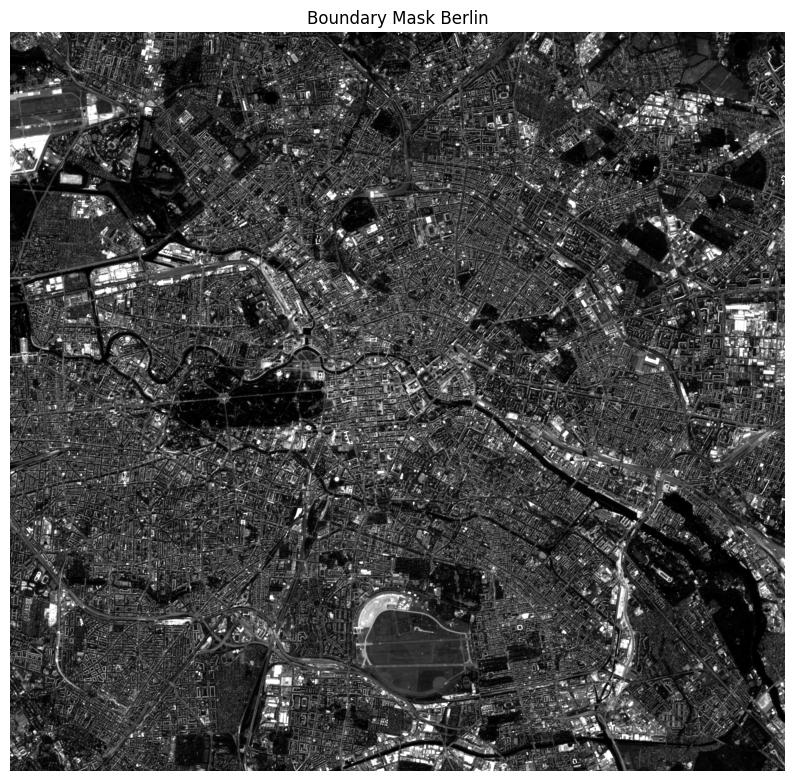

In [14]:
from utilities.plot_utils import plot_band

plot_band(image[0], title="Boundary Mask Berlin", cmap="grey")


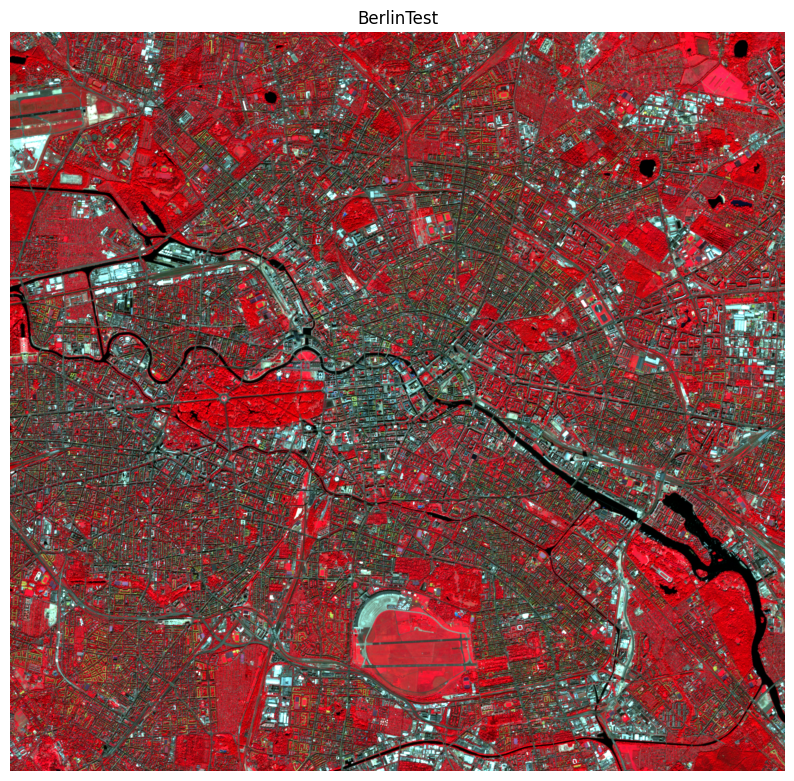

In [17]:
plot_bands(image, bands=[b["B08"], b["B04"], b["B03"]], title="BerlinTest")